# The Motion of a Spacecraft in the Earth-Moon System
The purpose of this section is to develop the Bayesian approach to inverse problem in an ordinary differential equation (ODE) and compute posterior probability density function for the parameters by using Markov Chain Monte Carlo (MCMC). The key to the proposed method is to get knowledge about uncertain parameters in the Restricted Three-Body Problem (R3BP). The three-body problem describes the motion of three point masses (such as stars, planets or the sun) by taking into account their initial positions and velocities. In the circular R3BP, the equations of motion for the 3rd body are expressed in a rotating frame where the primaries are fixed on the x-axis at positions $(-\mu, 0, 0)$ and $(1-\mu, 0, 0)$. Here $µ$ is the mass parameter defines as $\mu=\frac{m_{Moon}}{m_{Earth} + m_{Moon}}$. The third body has position $(x(t), y(t), z(t))$, at time t. The forward model characterized by the following ODE 

\begin{align}
\ddot x - 2\dot y &= \frac{\partial \Omega}{\partial x}  \\
\ddot y + 2\dot x &= \frac{\partial \Omega}{\partial y}  \\
\ddot z &= \frac{\partial \Omega}{\partial z} 
\end{align}

where

\begin{equation}
\Omega(x, y, z)= \frac{1}{2}(x^2 + y^2) + \frac{1-\mu}{r_1} + \frac{\mu}{r_2} 
\end{equation}

with $r_1 ^2 = (x + \mu)^2 + y^2 + z^2$ and $r_2 ^2= (x - 1 + \mu)^2 + y^2 + z^2$ are the distances from the 3rd body to the primaries. The the equations become

\begin{align}
\ddot x - 2\dot y &= x - \frac{(1-\mu)}{r_1 ^3}(x + \mu) - \frac{\mu}{r_2 ^3}(x - 1 + \mu)  \\
\ddot y + 2\dot x &= y- \frac{(1-\mu)}{r_1 ^3}y - \frac{\mu}{r_2 ^3}y \\
\ddot z &= -\frac{(1-\mu)}{r_1 ^3}z - \frac{\mu}{r_2 ^3}z
\end{align}
The initial conditions are 
\begin{align*}
x(t)&= -0.8, & \dot x(t)&=0  \\
y(t)&= 0,   & \dot y(t)&=-0.6276410653920693  \\
z(t)&= 0,   & \dot z(t)&=0 
\end{align*}

We select  $m_{Earth} = 5, 9742 \times 10^{24}$ kg and $m_{Moon} = 7,3477 \times 10^{22}$ kg, so the parameter $\mu_{true}=0.012149623731558415$ is the true value. Moreover observed data $Y$ represents the solution to the forward problem $G(\mu)$ (solves the system of ODEs for a given parameter $\mu$), with the addition of zero-centered Gaussian noise

$$
    Y = G(\mu) + \eta,\quad \eta \sim \mathcal{N}(0,\sigma_{noise}^2)
$$

where $G(\mu) = (x, y, z; \mu)$ and $\sigma_{noise}^2 = 0.01$.
Then by, we assume that we have Gaussian prior, $\mu \sim N(0.012, 0.01^2)$. The posterior can therefore be constructed as

\begin{equation}
\pi^{Y}(\mu) = \frac{1}{Z}\nu(Y-G(\mu))\rho(\mu) 
\end{equation}

We can use `odeint` which is a numerical method to solve the ODEs. The `odeint` function takes the function defining ODE system, initial conditions, the time points, additional parameters which is in this case $\mu$. This will give you the trajectory of the spacecraft in terms of position and velocity. Subsequently, we can substitute the exact mapping $G(\mu)$ with the numerical approximation.  

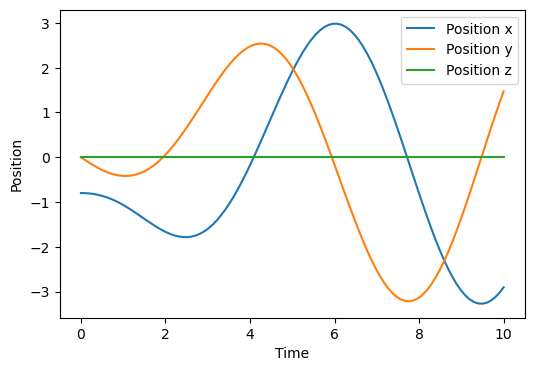

In [52]:
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

m_earth = 59742 * (10**24)
m_moon = 73477 * (10**22)

mu = m_moon / (m_earth + m_moon)

# spacecraft function 
def spacecraft(parameters, t, mu):
    x, y, z, v_x, v_y, v_z = parameters
    
    r1 = np.sqrt((x+mu)**2 + y**2 + z**2)
    r2 = np.sqrt((x-1+mu)**2 + y**2 + z**2)

    a_x = 2 * v_y + x - (1-mu)*(x+mu)/(r1)**3 - (mu)*(x-1+mu)/(r2)**3
    a_y = -2 * v_x + y - (1-mu)*(y)/(r1)**3 - (mu)*(y)/(r2)**3 
    a_z = -(1-mu)*(z)/(r1)**3 - (mu)*(z)/(r2)**3
    
    return v_x, v_y, v_z, a_x, a_y, a_z

# initial conditions 
x_0 = -0.8
y_0 = 0
z_0 = 0
v_x0 = 0
v_y0 = -0.6276410653920693
v_z0 = 0
parameters0 = [x_0, y_0, z_0, v_x0, v_y0, v_z0]

t = np.linspace(0, 10, 100)

# get the values of x,y,z and v_x,v_y,v_z respectively 
result = odeint(spacecraft, parameters0, t, args=(mu,))

x = result[:, 0]
y = result[:, 1]
z = result[:, 2]

# Plot the results
plt.figure(figsize=(6, 4))

plt.plot(t, x, label='Position x')
plt.plot(t, y, label='Position y')
plt.plot(t, z, label='Position z')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()

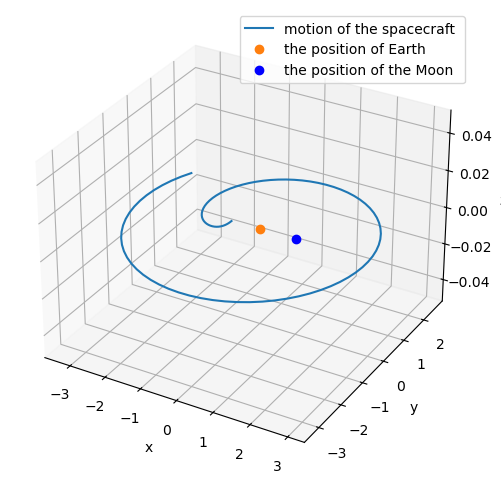

In [53]:
# plotting 
Earth_x=[-mu]
Earth_y=[0]
Earth_z=[0]
Moon_x=[1-mu]
Moon_y=[0]
Moon_z=[0]

ax = plt.figure(figsize=(8,6)).add_subplot(projection='3d')
ax.plot(x, y, z, label='motion of the spacecraft ')
ax.plot(Earth_x, Earth_y, Earth_z, "o", label='the position of Earth')
ax.plot(Moon_x, Moon_y, Moon_z, "bo", label='the position of the Moon')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()